In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand


def mandelbrot(xmin, xmax, ymin, ymax, xiter, yiter, limit):
    pixel_list = np.zeros((xiter+1, yiter+1))
    a_step = -1
    b_step = -1

    for a in np.linspace(xmin, xmax, xiter):
        a_step += 1
        b_step = 0
        for b in np.linspace(ymin, ymax, yiter):
            b_step += 1
            z_0 = complex(a, b)
            z = z_0
            counter = 0

            while abs(z) < 2 and counter < 250:
                z = z ** 2 + z_0
                counter += 1
                
            pixel_list[b_step][a_step] = counter
    

    return pixel_list
    





In [2]:
xmin = -2
xmax = 0.5
ymin = -2
ymax = 2
xiter = 2000
yiter = 2000
limit = 200

pixel_list = mandelbrot(xmin, xmax, ymin, ymax, xiter, yiter, limit)




[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


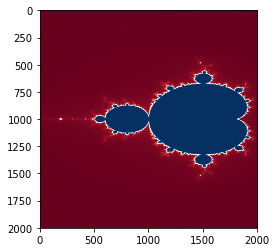

In [4]:

%matplotlib inline
print(pixel_list)

plt.imshow(pixel_list, cmap='RdBu')
plt.show()